In [1]:
# ! pip install pandas==0.25

In [2]:
# import pkg_resources
# pkg_resources.require("Pandas==0.25") # for panads_profiling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn

%matplotlib inline
wn.filterwarnings('ignore')

In [3]:
pd.__version__

'1.1.4'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Competições/Modeling Earthquake Damage/train_values.csv')
val = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Competições/Modeling Earthquake Damage/test_values.csv')
train_labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Competições/Modeling Earthquake Damage/train_labels.csv')

In [6]:
train = train.merge(train_labels)

In [7]:
train.shape, val.shape

((260601, 40), (86868, 39))

In [8]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [9]:
train = train.drop(['building_id'], axis=1)

# EDA

## Report

In [10]:
# from pandas_profiling import ProfileReport

# report = ProfileReport(train)

In [11]:
# report

## Imbalance


In [12]:
numeric = train.select_dtypes('number')

In [13]:
binary = numeric.drop(['geo_level_1_id',
                      'geo_level_2_id',
                      'geo_level_3_id',
                      'count_floors_pre_eq',
                      'age',
                      'area_percentage',
                      'height_percentage',
                      'count_families',
                      'damage_grade'], axis=1)

In [14]:
# check imbalance
# has_superstructure_mud_mortar_stone
# has_superstructure_timber
# has_secondary_use
labels = binary.columns.tolist()
for label in labels:
  print(label,'     ',binary[label].value_counts().tolist()[1]/binary[label].value_counts().tolist()[0])

has_superstructure_adobe_mud       0.09726736842105263
has_superstructure_mud_mortar_stone       0.312448063819179
has_superstructure_stone_flag       0.03555278278906753
has_superstructure_cement_mortar_stone       0.018573455436605185
has_superstructure_mud_mortar_brick       0.0731386921429748
has_superstructure_cement_mortar_brick       0.08139476982065348
has_superstructure_timber       0.3422593754345844
has_superstructure_bamboo       0.09290953545232274
has_superstructure_rc_non_engineered       0.044484613349792784
has_superstructure_rc_engineered       0.016115070886036465
has_superstructure_other       0.015212547137470004
has_secondary_use       0.12597377346669836
has_secondary_use_agriculture       0.068807828597677
has_secondary_use_hotel       0.03479617849569962
has_secondary_use_rental       0.008166660218963983
has_secondary_use_institution       0.0009410192198374533
has_secondary_use_school       0.00036083483361291636
has_secondary_use_industry       0.00107174960

In [15]:
nominal = train.select_dtypes('object')

In [16]:
# check imbalance
# land_surface_condition
# roof_type
# ground_floor_type
# other_floor_type
labels = nominal.columns.tolist()
for label in labels:
  print(label,'     ',nominal[label].value_counts().tolist()[1]/nominal[label].value_counts().tolist()[0])

land_surface_condition       0.1639070479846095
foundation_type       0.06897023668315115
roof_type       0.33677163890134654
ground_floor_type       0.11867721914521108
other_floor_type       0.26287194007816944
position       0.21226186352615173
plan_configuration       0.02276144470392527
legal_ownership_status       0.021965497591048024


## Feature Engineering




### Feature Importance

In [17]:
X = train.drop(['damage_grade'], axis=1)
y = train['damage_grade']

In [18]:
cat_labels = X.select_dtypes('object').columns.tolist()

In [19]:
X = pd.get_dummies(X, columns=cat_labels)

In [20]:
X.shape, y.shape

((260601, 68), (260601,))

#### Wrapper Methods

##### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf_rf = RandomForestClassifier(random_state=42).fit(X,y)

In [23]:
RF_features = pd.DataFrame(clf_rf.feature_importances_, index=X.columns.tolist(), 
                         columns=['RF']).sort_values(by=['RF'], ascending=False).head(30).index.tolist()

In [24]:
RF_features

['geo_level_3_id',
 'geo_level_2_id',
 'geo_level_1_id',
 'age',
 'area_percentage',
 'height_percentage',
 'count_families',
 'count_floors_pre_eq',
 'foundation_type_r',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_timber',
 'ground_floor_type_v',
 'land_surface_condition_t',
 'has_superstructure_cement_mortar_brick',
 'ground_floor_type_f',
 'land_surface_condition_n',
 'position_s',
 'has_superstructure_adobe_mud',
 'other_floor_type_q',
 'roof_type_n',
 'has_secondary_use',
 'position_t',
 'roof_type_q',
 'has_superstructure_bamboo',
 'foundation_type_i',
 'has_superstructure_mud_mortar_brick',
 'other_floor_type_x',
 'ground_floor_type_x',
 'has_superstructure_stone_flag',
 'roof_type_x']

##### Extra Tree

In [25]:
from sklearn.tree import ExtraTreeClassifier

In [26]:
clf_et = ExtraTreeClassifier().fit(X,y)

In [27]:
ET_features = pd.DataFrame(clf_et.feature_importances_, index=X.columns.tolist(), 
                         columns=['ET']).sort_values(by=['ET'], ascending=False).head(30).index.tolist()

In [28]:
ET_features

['age',
 'area_percentage',
 'geo_level_3_id',
 'geo_level_1_id',
 'geo_level_2_id',
 'height_percentage',
 'count_families',
 'has_superstructure_mud_mortar_stone',
 'other_floor_type_s',
 'count_floors_pre_eq',
 'foundation_type_r',
 'has_superstructure_timber',
 'other_floor_type_j',
 'has_superstructure_adobe_mud',
 'has_superstructure_bamboo',
 'has_superstructure_stone_flag',
 'land_surface_condition_t',
 'ground_floor_type_f',
 'has_superstructure_mud_mortar_brick',
 'ground_floor_type_x',
 'position_t',
 'has_superstructure_cement_mortar_brick',
 'position_s',
 'land_surface_condition_n',
 'has_superstructure_rc_non_engineered',
 'roof_type_n',
 'foundation_type_i',
 'has_secondary_use',
 'has_superstructure_other',
 'plan_configuration_d']

##### Select Predictors

In [29]:
wrapper_features = []
for el in RF_features:
  if el in ET_features:
    wrapper_features.append(el)

In [30]:
print(len(wrapper_features))
wrapper_features

25


['geo_level_3_id',
 'geo_level_2_id',
 'geo_level_1_id',
 'age',
 'area_percentage',
 'height_percentage',
 'count_families',
 'count_floors_pre_eq',
 'foundation_type_r',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_timber',
 'land_surface_condition_t',
 'has_superstructure_cement_mortar_brick',
 'ground_floor_type_f',
 'land_surface_condition_n',
 'position_s',
 'has_superstructure_adobe_mud',
 'roof_type_n',
 'has_secondary_use',
 'position_t',
 'has_superstructure_bamboo',
 'foundation_type_i',
 'has_superstructure_mud_mortar_brick',
 'ground_floor_type_x',
 'has_superstructure_stone_flag']

#### Filter Methods

In [31]:
filter = train.copy()
filter = pd.get_dummies(filter, columns=cat_labels)

In [32]:
train.shape, filter.shape

((260601, 39), (260601, 69))

##### Quantitative





In [33]:
quantitative = filter[['geo_level_1_id',
                      'geo_level_2_id',
                      'geo_level_3_id',
                      'count_floors_pre_eq',
                      'age',
                      'area_percentage',
                      'height_percentage',
                      'count_families',
                      'damage_grade']]

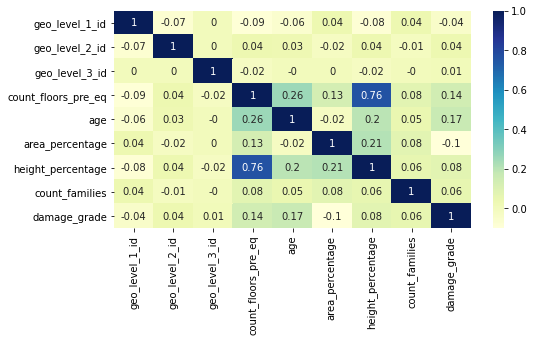

In [34]:
# spearm correlation heatmap
fig, ax=plt.subplots(figsize=(8,4))
sns.heatmap(quantitative.select_dtypes('number').corr(method='spearman').round(2), annot=True, cmap='YlGnBu', ax=ax);

In [35]:
from scipy.stats import spearmanr

###### count_floors_pre_eq ; height_percentage

In [36]:
spearmanr(train['count_floors_pre_eq'], train['height_percentage']) # high correlation

SpearmanrResult(correlation=0.7554792083087991, pvalue=0.0)

In [37]:
spearmanr(train['count_floors_pre_eq'], train['damage_grade']) # use count_floors_pre_eq

SpearmanrResult(correlation=0.14169833217151567, pvalue=0.0)

In [38]:
spearmanr(train['height_percentage'], train['damage_grade']) 

SpearmanrResult(correlation=0.08028182614939544, pvalue=0.0)

###### Association

In [39]:
quantitative_labels = quantitative.columns.tolist()
quantitative_labels.remove('height_percentage')
quantitative_labels.remove('damage_grade')

In [40]:
quantitative_association = []
for label in quantitative_labels:
  corr, _ = spearmanr(filter[label], filter['damage_grade'])
  if corr > 0.2:
    quantitative_association.append(label)

In [41]:
quantitative_association

[]

##### Nominal

In [42]:
from scipy.stats import chi2_contingency

In [43]:
def cramers_v(var1, var2):
  confusion_matrix = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum()
  phi2 = chi2 / n
  r, k = confusion_matrix.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [44]:
quantitative_labels = quantitative.columns.tolist()
binary_labels = filter.drop(quantitative_labels, axis=1).columns.tolist()

In [45]:
binary_corr = []
for i in range(len(binary_labels)):
  for j in range(len(binary_labels)):
    try:
      assert binary_labels[i] != binary_labels[j]
      binary_corr.append([binary_labels[i], 
                       binary_labels[j], 
                       cramers_v(filter[binary_labels[i]], filter[binary_labels[j]])]
                      )
    except:
      pass

In [46]:
binary_association = pd.DataFrame(binary_corr, columns=['label1','label2','Cramer_V'])\
                                  .drop_duplicates(subset=['Cramer_V'])\
                                  .sort_values(by=['Cramer_V'], ascending=False)

###### Strong association

In [47]:
label1 = binary_association.query('Cramer_V>=0.7')['label1'].tolist()
label2 = binary_association.query('Cramer_V>=0.7')['label2'].tolist()

strong_association = []
caution = []
for el1,el2 in zip(label1,label2):
  val1 = cramers_v(filter[el1], filter['damage_grade'])
  val2 = cramers_v(filter[el2], filter['damage_grade'])
  if val1 > 0.2:
    caution.append(el1)
  elif val2 > 0.2:
    caution.append(el2) 
  if val1 > val2:
    strong_association.append(el1)
  else:
    strong_association.append(el2)

strong_association = list(set(strong_association))
caution = list(set(caution))

In [48]:
strong_association

['roof_type_n',
 'land_surface_condition_t',
 'position_t',
 'roof_type_x',
 'plan_configuration_d',
 'legal_ownership_status_a',
 'has_secondary_use']

In [49]:
caution

['roof_type_x', 'foundation_type_i']

In [50]:
for el in caution:
  if el not in strong_association:
    strong_association.append(el)

In [51]:
strong_association

['roof_type_n',
 'land_surface_condition_t',
 'position_t',
 'roof_type_x',
 'plan_configuration_d',
 'legal_ownership_status_a',
 'has_secondary_use',
 'foundation_type_i']

###### Moderate association

In [52]:
label1 = binary_association.query('0.3<=Cramer_V<0.7')['label1'].tolist()
label2 = binary_association.query('0.3<=Cramer_V<0.7')['label2'].tolist()

moderate_association = []
caution = []
for el1,el2 in zip(label1,label2):
  val1 = cramers_v(filter[el1], filter['damage_grade'])
  val2 = cramers_v(filter[el2], filter['damage_grade'])
  if val1 > 0.2: 
    caution.append(el1)
  elif val2 > 0.3:
    caution.append(el2)
  if val1 > val2:
    moderate_association.append(el1)
  else:
    moderate_association.append(el2)

moderate_association = list(set(moderate_association))
caution = list(set(caution))

In [53]:
moderate_association

['foundation_type_r',
 'ground_floor_type_v',
 'other_floor_type_q',
 'foundation_type_w',
 'legal_ownership_status_v',
 'has_superstructure_adobe_mud',
 'land_surface_condition_t',
 'has_secondary_use_hotel',
 'foundation_type_i',
 'position_j',
 'other_floor_type_s',
 'has_superstructure_mud_mortar_stone',
 'roof_type_x',
 'plan_configuration_u',
 'has_superstructure_timber',
 'has_superstructure_cement_mortar_brick',
 'ground_floor_type_f']

In [54]:
caution

['foundation_type_r',
 'ground_floor_type_v',
 'has_superstructure_rc_engineered',
 'other_floor_type_q',
 'ground_floor_type_f',
 'foundation_type_i',
 'has_superstructure_mud_mortar_stone',
 'roof_type_x',
 'has_superstructure_cement_mortar_brick']

In [55]:
for el in caution:
  if el not in moderate_association:
    moderate_association.append(el)

In [56]:
moderate_association

['foundation_type_r',
 'ground_floor_type_v',
 'other_floor_type_q',
 'foundation_type_w',
 'legal_ownership_status_v',
 'has_superstructure_adobe_mud',
 'land_surface_condition_t',
 'has_secondary_use_hotel',
 'foundation_type_i',
 'position_j',
 'other_floor_type_s',
 'has_superstructure_mud_mortar_stone',
 'roof_type_x',
 'plan_configuration_u',
 'has_superstructure_timber',
 'has_superstructure_cement_mortar_brick',
 'ground_floor_type_f',
 'has_superstructure_rc_engineered']

###### Join

In [57]:
nominal_association = strong_association
for el in moderate_association:
  if el not in nominal_association:
    nominal_association.append(el)

In [58]:
nominal_association

['roof_type_n',
 'land_surface_condition_t',
 'position_t',
 'roof_type_x',
 'plan_configuration_d',
 'legal_ownership_status_a',
 'has_secondary_use',
 'foundation_type_i',
 'foundation_type_r',
 'ground_floor_type_v',
 'other_floor_type_q',
 'foundation_type_w',
 'legal_ownership_status_v',
 'has_superstructure_adobe_mud',
 'has_secondary_use_hotel',
 'position_j',
 'other_floor_type_s',
 'has_superstructure_mud_mortar_stone',
 'plan_configuration_u',
 'has_superstructure_timber',
 'has_superstructure_cement_mortar_brick',
 'ground_floor_type_f',
 'has_superstructure_rc_engineered']

##### Quantitative / Binary

In [59]:
from scipy.stats import pointbiserialr

In [60]:
biserial = []
for i in range(len(binary_labels)):
  for j in range(len(quantitative_labels)):
    value, _ = pointbiserialr(filter[binary_labels[i]], filter[quantitative_labels[j]])
    biserial.append(
                    [binary_labels[i], quantitative_labels[j], value]
                    )

In [61]:
biserial_association = pd.DataFrame(biserial, columns=['label1','label2','Point_Biserial'])\
                                    .drop_duplicates(subset=['Point_Biserial'])\
                                    .sort_values(by=['Point_Biserial'], ascending=False)

In [62]:
label1 = biserial_association.query('Point_Biserial<=-0.7 or Point_Biserial>=0.7')['label1'].tolist()
label2 = biserial_association.query('Point_Biserial<=-0.7 or Point_Biserial>=0.7')['label2'].tolist()

quantitative_binary_association = label1
for el in label2:
  if el not in quantitative_binary_association:
    quantitative_binary_association.append(el)

In [63]:
quantitative_binary_association

[]

##### Association with response variable

In [64]:
filter_features = quantitative_association

for el in nominal_association:
  if el not in filter_features:
    filter_features.append(el)

for el in quantitative_binary_association:
  if el not in filter_features:
    filter_features.append(el)

In [65]:
print(len(filter_features))
filter_features

23


['roof_type_n',
 'land_surface_condition_t',
 'position_t',
 'roof_type_x',
 'plan_configuration_d',
 'legal_ownership_status_a',
 'has_secondary_use',
 'foundation_type_i',
 'foundation_type_r',
 'ground_floor_type_v',
 'other_floor_type_q',
 'foundation_type_w',
 'legal_ownership_status_v',
 'has_superstructure_adobe_mud',
 'has_secondary_use_hotel',
 'position_j',
 'other_floor_type_s',
 'has_superstructure_mud_mortar_stone',
 'plan_configuration_u',
 'has_superstructure_timber',
 'has_superstructure_cement_mortar_brick',
 'ground_floor_type_f',
 'has_superstructure_rc_engineered']

### Select Predictors

wrapper_features\
filter_features

In [66]:
train_df = train.copy()
val_df = val.copy()

In [67]:
categorical_labels = train_df.select_dtypes('object').columns.tolist()

In [68]:
train_df = pd.get_dummies(train_df, columns = categorical_labels)
val_df = pd.get_dummies(val_df, columns=categorical_labels)

In [69]:
# predictors = wrapper_features

# for el in filter_features:
#   if el not in predictors:
#     predictors.append(el)

In [70]:
wrapper_features.append('damage_grade')

In [71]:
train_df = train_df[wrapper_features]

In [72]:
wrapper_features.remove('damage_grade')

In [73]:
val_df = val_df[wrapper_features]

### Feature Transformation

In [74]:
train_df.head(3)

,geo_level_3_id,geo_level_2_id,geo_level_1_id,age,area_percentage,height_percentage,count_families,count_floors_pre_eq,foundation_type_r,has_superstructure_mud_mortar_stone,has_superstructure_timber,land_surface_condition_t,has_superstructure_cement_mortar_brick,ground_floor_type_f,land_surface_condition_n,position_s,has_superstructure_adobe_mud,roof_type_n,has_secondary_use,position_t,has_superstructure_bamboo,foundation_type_i,has_superstructure_mud_mortar_brick,ground_floor_type_x,has_superstructure_stone_flag,damage_grade
0,12198,487,6,30,6,5,1,2,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,3
1,2812,900,8,10,8,7,1,2,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,2
2,8973,363,21,10,5,5,1,2,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,3


#### geo_level_1_id

In [75]:
from sklearn.cluster import KMeans

In [76]:
geo1 = np.array(train_df['geo_level_1_id']).reshape(-1,1)
association = []
clusters = np.arange(2,11)
for c in clusters:
  kmeans = KMeans(n_clusters=c, random_state=42).fit(geo1)
  ass, _ = spearmanr(train_df['damage_grade'], kmeans.labels_) 
  association.append([c,ass])

association # 3 or 5 clusters

[[2, -0.012919720573425855],
 [3, 0.1675160166885989],
 [4, -0.06638476450494157],
 [5, -0.166109182139388],
 [6, 0.08985218587150919],
 [7, 0.02818666042759728],
 [8, 9.114089694292648e-05],
 [9, 0.022999168980235903],
 [10, 0.026354635626087784]]

In [77]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(geo1)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 46549, 132347,  81705]))

In [78]:
train_df['geo1_kmeans'] = kmeans.labels_

In [79]:
geo1_validation = np.array(val_df['geo_level_1_id']).reshape(-1,1)
kmeans = KMeans(n_clusters=3, random_state=42).fit(geo1_validation)

In [80]:
val_df['geo1_kmeans'] = geo1_validation

#### geo_level_2_id

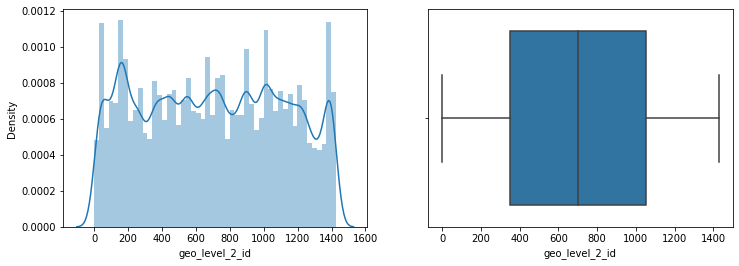

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.distplot(train_df['geo_level_2_id'],ax=ax1)
sns.boxplot(train_df['geo_level_2_id'],ax=ax2);

In [ ]:
gmm = GaussianMixture(n_components=4).fit(train_df[['geo_level_2_id','damage_grade']])
geo2 = gmm.predict(train_df[['geo_level_2_id','damage_grade']])

In [ ]:
# geo2 = pd.qcut(train_df['geo_level_2_id'], 6, labels=[1,2,3,4,5,6])

In [ ]:
np.unique(geo2, return_counts=True)

(array([0, 1, 2, 3]), array([65448, 64453, 50753, 79947]))

In [ ]:
spearmanr(geo2, train_df['damage_grade'])

SpearmanrResult(correlation=-0.046252149802177546, pvalue=2.1932948719682198e-123)

In [ ]:
spearmanr(geo2, train_df['geo_level_2_id'])

SpearmanrResult(correlation=0.08081780967082794, pvalue=0.0)

#### geo_level_3_id

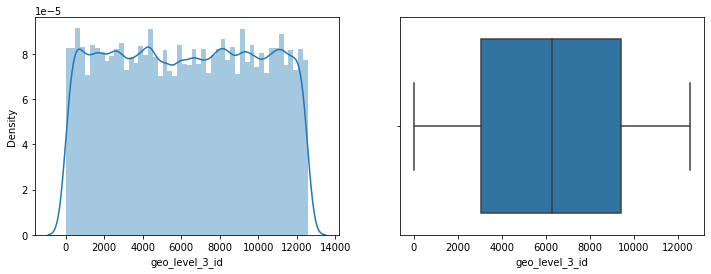

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.distplot(train_df['geo_level_3_id'],ax=ax1)
sns.boxplot(train_df['geo_level_3_id'],ax=ax2);

In [ ]:
gmm = GaussianMixture(n_components=4).fit(train_df[['geo_level_3_id','damage_grade']])
geo3 = gmm.predict(train_df[['geo_level_3_id','damage_grade']])

In [ ]:
# geo3 = pd.qcut(train_df['geo_level_3_id'], 4, labels=list(range(4)))

In [ ]:
np.unique(geo3, return_counts=True)

(array([0, 1, 2, 3, 4]), array([53605, 53269, 48790, 54438, 50499]))

In [ ]:
spearmanr(geo3, train_df['damage_grade'])

SpearmanrResult(correlation=0.027757310605349195, pvalue=1.355513427968742e-45)

In [ ]:
spearmanr(train_df['geo_level_3_id'], geo3)

SpearmanrResult(correlation=-0.15503221119436297, pvalue=0.0)

#### a

#### geo_level_1_id ; has_superstructure_bamboo

##### plot

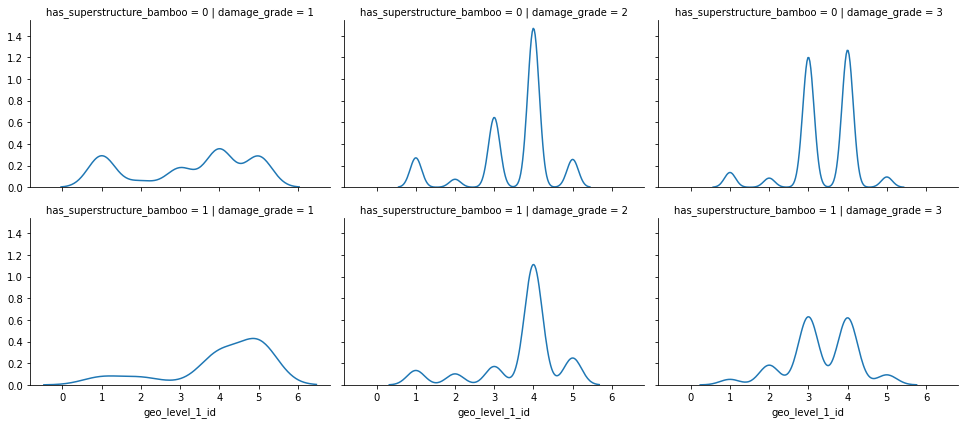

In [ ]:
# if geo1 < 5 and has_sup == 0: pred = 2; elif geo1<5 and has_sup==1: pred = 2
sns.FacetGrid(train_df.query('0<geo_level_1_id<=5'), row='has_superstructure_bamboo', height=3, aspect=1.5,
              col='damage_grade').map_dataframe(sns.kdeplot, 'geo_level_1_id').add_legend();

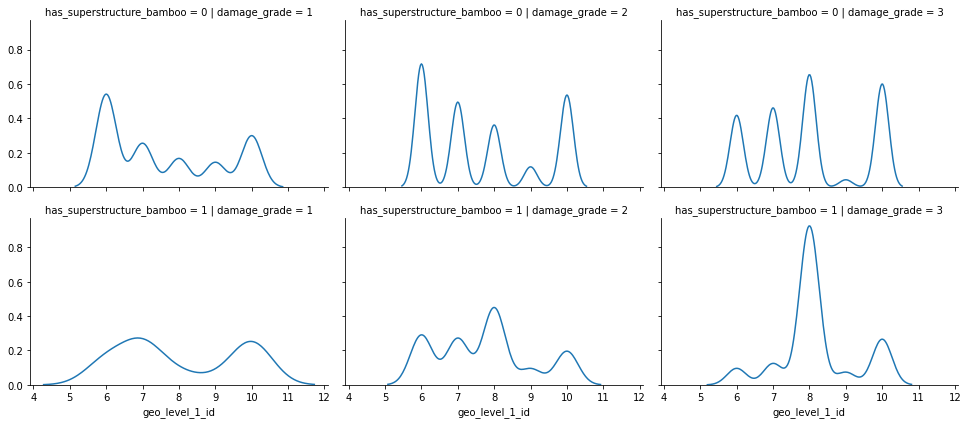

In [ ]:
# if 5<geo1<=10 and has_sup == 0: pred = 2; elif 5<geo1<=10 and has_sup==1: pred = 3
sns.FacetGrid(train_df.query('5<geo_level_1_id<=10'), row='has_superstructure_bamboo', height=3, aspect=1.5,
              col='damage_grade').map_dataframe(sns.kdeplot, 'geo_level_1_id').add_legend();

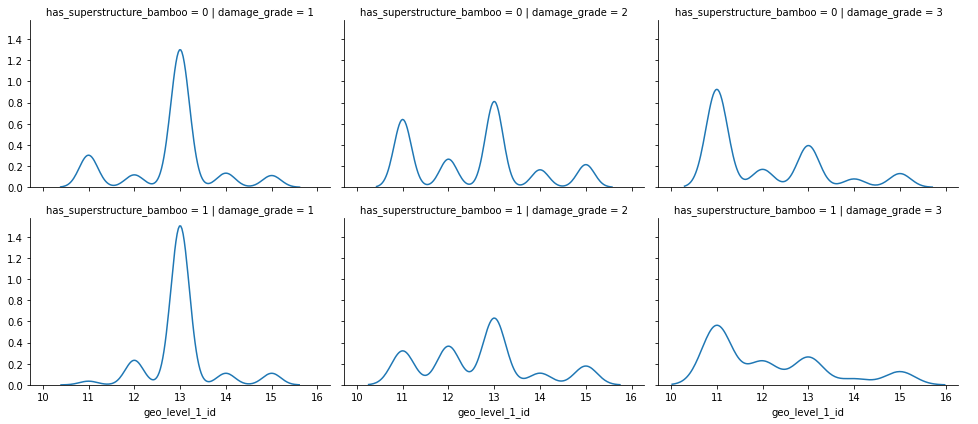

In [ ]:
# if 10<geo1<=15 and has_sup == 0: pred = 1; elif 10<geo1<=15 and has_sup==1: pred = 1
sns.FacetGrid(train_df.query('10<geo_level_1_id<=15'), row='has_superstructure_bamboo', height=3, aspect=1.5,
              col='damage_grade').map_dataframe(sns.kdeplot, 'geo_level_1_id').add_legend();

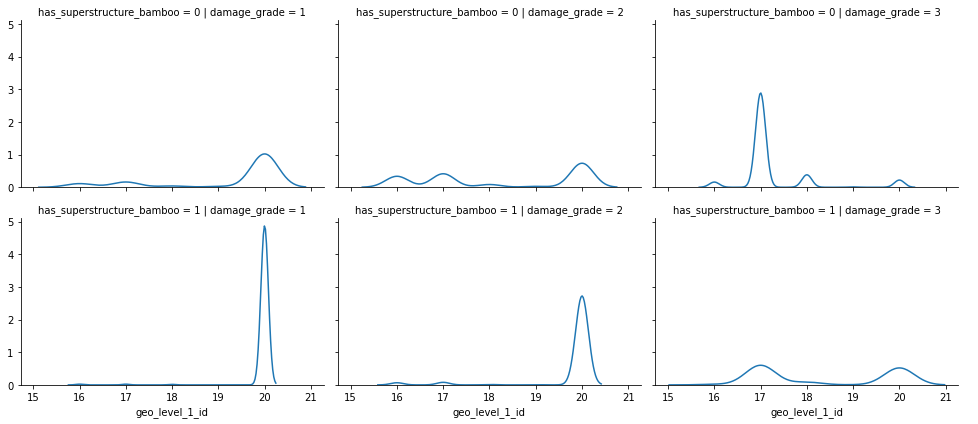

In [ ]:
# if 15<geo1<=20 and has_sup == 0: pred = 3; elif 15<geo1<=20 and has_sup==1: pred = 1
sns.FacetGrid(train_df.query('15<geo_level_1_id<=20'), row='has_superstructure_bamboo', height=3, aspect=1.5,
              col='damage_grade').map_dataframe(sns.kdeplot, 'geo_level_1_id').add_legend();

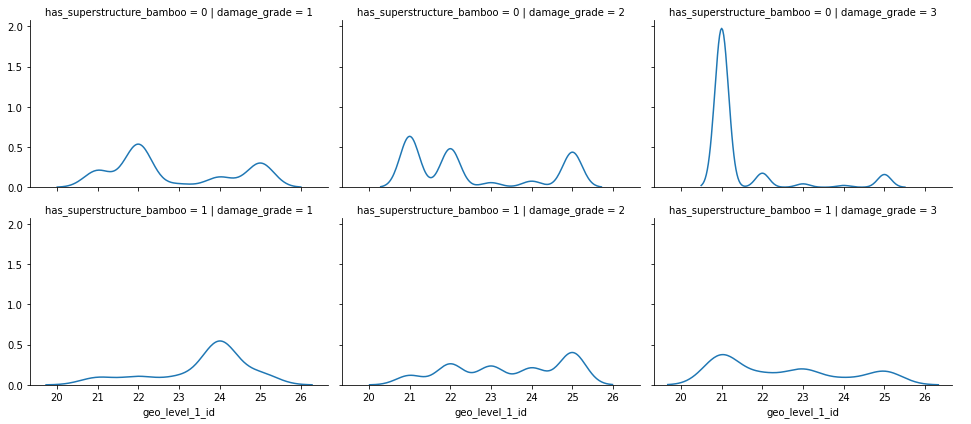

In [ ]:
# if 20<geo1<=25 and has_sup == 0: pred = 3; elif 20<geo1<=25 and has_sup==1: pred = 1
sns.FacetGrid(train_df.query('20<geo_level_1_id<=25'), row='has_superstructure_bamboo', height=3, aspect=1.5,
              col='damage_grade').map_dataframe(sns.kdeplot, 'geo_level_1_id').add_legend();

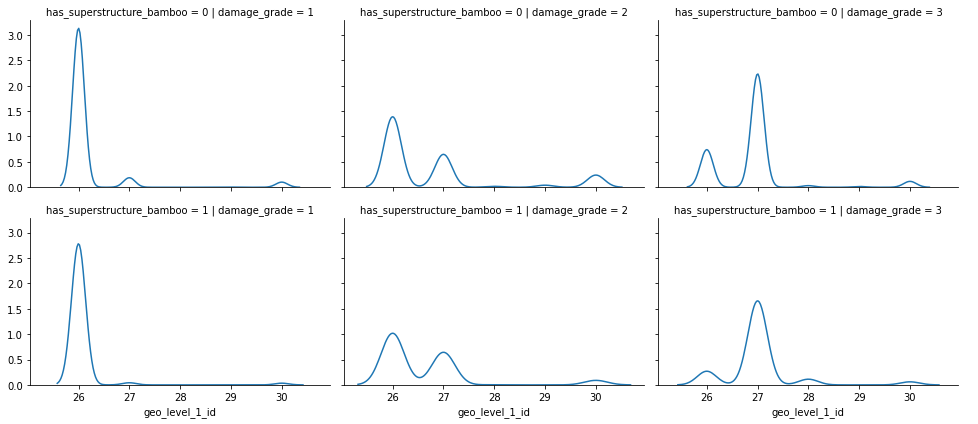

In [ ]:
# if geo1>25 and has_sup == 0: pred = 1; elif geo1>25 and has_sup==1: pred = 1
sns.FacetGrid(train_df.query('geo_level_1_id>25'), row='has_superstructure_bamboo', height=3, aspect=1.5,
              col='damage_grade').map_dataframe(sns.kdeplot, 'geo_level_1_id').add_legend();

##### Create predictor

In [ ]:
bamboo = np.array(train_df['has_superstructure_bamboo']) # binary
geo1 = np.array(train_df['geo_level_1_id']) # discrete but consider continuous
geo_var = np.zeros(geo1.shape)

for i in range(geo_var.shape[0]):
  if geo1[i]<5 and bamboo[i]==0: 
    geo_var[i]=2
  elif geo1[i]<5 and bamboo[i]==1:
    geo_var[i]=2
  elif 5<geo1[i]<=10 and bamboo[i]==0: 
    geo_var[i]=2
  elif 5<geo1[i]<=10 and bamboo[i]==1:
    geo_var[i]=3
  elif 10<geo1[i]<=15 and bamboo[i]==0: 
    geo_var[i]=1
  elif 10<geo1[i]<=15 and bamboo[i]==1:
    geo_var[i]=1
  elif 15<geo1[i]<=20 and bamboo[i]==0: 
    geo_var[i]=3
  elif 15<geo1[i]<=20 and bamboo[i]==1:
    geo_var[i]=1
  elif 20<geo1[i]<=25 and bamboo[i]==0: 
    geo_var[i]=3
  elif 20<geo1[i]<=25 and bamboo[i]==1:
    geo_var[i]=1
  elif geo1[i]>25 and bamboo[i]==0: 
    geo_var[i]=1
  elif geo1[i]>25 and bamboo[i]==1:
    geo_var[i]=1


In [ ]:
spearmanr(train_df['damage_grade'], geo_var)

SpearmanrResult(correlation=0.2276099074634316, pvalue=0.0)

In [ ]:
spearmanr(geo1, geo_var)

SpearmanrResult(correlation=-0.09270085436211016, pvalue=0.0)

In [ ]:
train_df['geo1_bamboo'] = geo_var

In [ ]:
bamboo = np.array(val_df['has_superstructure_bamboo']) # binary
geo1 = np.array(val_df['geo_level_1_id']) # discrete but consider continuous
geo_var = np.zeros(geo1.shape)

for i in range(geo_var.shape[0]):
  if geo1[i]<5 and bamboo[i]==0: 
    geo_var[i]=2
  elif geo1[i]<5 and bamboo[i]==1:
    geo_var[i]=2
  elif 5<geo1[i]<=10 and bamboo[i]==0: 
    geo_var[i]=2
  elif 5<geo1[i]<=10 and bamboo[i]==1:
    geo_var[i]=3
  elif 10<geo1[i]<=15 and bamboo[i]==0: 
    geo_var[i]=1
  elif 10<geo1[i]<=15 and bamboo[i]==1:
    geo_var[i]=1
  elif 15<geo1[i]<=20 and bamboo[i]==0: 
    geo_var[i]=3
  elif 15<geo1[i]<=20 and bamboo[i]==1:
    geo_var[i]=1
  elif 20<geo1[i]<=25 and bamboo[i]==0: 
    geo_var[i]=3
  elif 20<geo1[i]<=25 and bamboo[i]==1:
    geo_var[i]=1
  elif geo1[i]>25 and bamboo[i]==0: 
    geo_var[i]=1
  elif geo1[i]>25 and bamboo[i]==1:
    geo_var[i]=1


In [ ]:
val_df['geo1_bamboo'] = geo_var

#### count_floors_pre_eq

##### plot

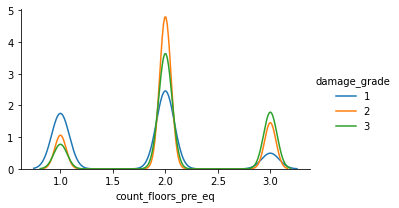

In [ ]:
sns.FacetGrid(train_df.query('count_floors_pre_eq<4'), height=3, aspect=1.5, 
              hue='damage_grade').map_dataframe(sns.kdeplot, 'count_floors_pre_eq').add_legend();

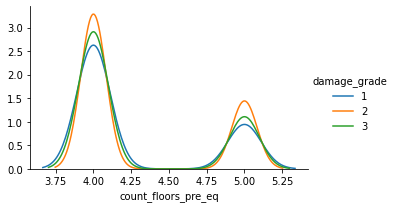

In [ ]:
sns.FacetGrid(train_df.query('4<=count_floors_pre_eq and count_floors_pre_eq<6'), height=3, aspect=1.5,
              hue='damage_grade').map_dataframe(sns.kdeplot, 'count_floors_pre_eq').add_legend();

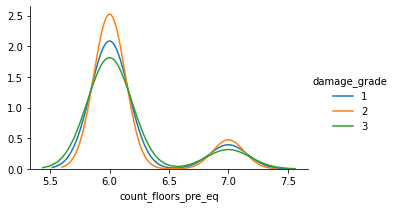

In [ ]:
sns.FacetGrid(train_df.query('count_floors_pre_eq>=6 and count_floors_pre_eq<8'), height=3, aspect=1.5,
              hue='damage_grade').map_dataframe(sns.kdeplot, 'count_floors_pre_eq').add_legend();

##### create predictor

In [ ]:
count_floors = np.array(train_df['count_floors_pre_eq']) # discrete
var_count_floors = np.zeros(count_floors.shape)

for i in range(var_count_floors.shape[0]):
  if count_floors[i]==1:
    var_count_floors[i]=1
  elif count_floors[i]==3:
    var_count_floors[i]=3
  else:
    var_count_floors[i]=2

In [ ]:
spearmanr(train_df['damage_grade'], var_count_floors)

SpearmanrResult(correlation=0.16516997056175053, pvalue=0.0)

In [ ]:
spearmanr(train_df['damage_grade'], count_floors)

SpearmanrResult(correlation=0.1416983321715157, pvalue=0.0)

In [ ]:
spearmanr(count_floors, var_count_floors)

SpearmanrResult(correlation=0.933523229673532, pvalue=0.0)

In [ ]:
train_df['count_floors_pre_eq'] = var_count_floors

In [ ]:
count_floors = np.array(val_df['count_floors_pre_eq']) # discrete
var_count_floors = np.zeros(count_floors.shape)

for i in range(var_count_floors.shape[0]):
  if count_floors[i]==1:
    var_count_floors[i]=1
  elif count_floors[i]==3:
    var_count_floors[i]=3
  else:
    var_count_floors[i]=2

In [ ]:
val_df['count_floors_pre_eq'] = var_count_floors

#### var

# Model

In [81]:
X = train_df.drop(['damage_grade'], axis=1)
y = train_df[['damage_grade']]

In [82]:
X.shape, y.shape

((260601, 26), (260601, 1))

### Split


In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((182420, 26), (78181, 26), (182420, 1), (78181, 1))

### LightGBM [[1]](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

#### Model

In [85]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

In [86]:
num_leaves = [10, 30, 50]
max_depth = [5, 10, 30, 50]
learning_rate = [0.5, 0.8, 1, 1.5]
n_estimators = [50, 100, 150]
subsample = [0.5, 0.8, 1]
min_child_samples = [10, 50, 100]
min_child_weight = [0.001, 0.01, 0.1, 1]
reg_alpha = [0, 0.1, 1, 5]
reg_lambda = [0, 0.1, 1, 5]

param_distributions = dict(num_leaves=num_leaves, max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators,
                           subsample=subsample, min_child_samples=min_child_samples, min_child_weight=min_child_weight,
                           reg_alpha=reg_alpha, reg_lambda=reg_lambda)

clf = LGBMClassifier(objective='multiclass', random_state=42, n_jobs=-1)

search = RandomizedSearchCV(estimator=clf, param_distributions=param_distributions, 
                            cv=3, scoring='accuracy', refit=True, verbose=True, random_state=42).fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.3min finished


In [87]:
search.best_params_

{'learning_rate': 0.5,
 'max_depth': 50,
 'min_child_samples': 10,
 'min_child_weight': 0.001,
 'n_estimators': 100,
 'num_leaves': 50,
 'reg_alpha': 0,
 'reg_lambda': 0.1,
 'subsample': 0.5}

In [88]:
lgbm = LGBMClassifier(objective='multiclass', random_state=42, 
                     learning_rate= 0.5,
                    max_depth= 5,
                    min_child_samples= 10,
                    min_child_weight= 0.01,
                    n_estimators= 150,
                    num_leaves= 50,
                    reg_alpha= 5,
                    reg_lambda= 1,
                    subsample= 1)

In [89]:
lgbm.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=5,
               min_child_samples=10, min_child_weight=0.01, min_split_gain=0.0,
               n_estimators=150, n_jobs=-1, num_leaves=50,
               objective='multiclass', random_state=42, reg_alpha=5,
               reg_lambda=1, silent=True, subsample=1, subsample_for_bin=200000,
               subsample_freq=0)

In [90]:
y_pred = lgbm.predict(x_test)

#### Evaluation

In [104]:
from sklearn.metrics import confusion_matrix, f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [131]:
confusion_matrix(y_test, y_pred, labels=[1,2,3])

array([[ 3667,  3835,    99],
       [ 1473, 37685,  5256],
       [  121, 10067, 15978]])

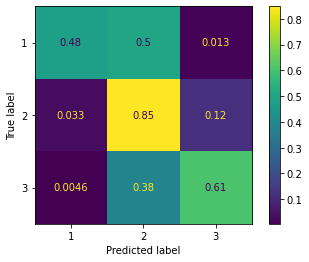

In [132]:
plot_confusion_matrix(lgbm, x_test, y_test, normalize='true');

In [133]:
f1_score(y_test, y_pred, average='micro')

0.733298371727146

In [134]:
cross_val_score(lgbm, x_train, y_train, cv=3).mean()

0.7276175903423977

- RF_features -> accuracy: 0.7350379248154921
- predictors -> accuracy: 0.7295762397513461
- filter_features -> accuracy: 0.5850782159348179

### Explaination

In [91]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(lgbm, approximate=True, nsamples=100)

### Eval

In [ ]:
df_eval = x_test.copy()
df_eval['y_true'] = y_test
df_eval['y_pred'] = y_pred

In [ ]:
df_eval.head()

,geo_level_3_id,geo_level_2_id,geo_level_1_id,age,area_percentage,height_percentage,count_families,count_floors_pre_eq,foundation_type_r,has_superstructure_mud_mortar_stone,has_superstructure_timber,land_surface_condition_t,has_superstructure_cement_mortar_brick,ground_floor_type_f,position_s,has_superstructure_adobe_mud,other_floor_type_q,roof_type_n,has_secondary_use,position_t,roof_type_q,has_superstructure_bamboo,has_superstructure_mud_mortar_brick,other_floor_type_x,ground_floor_type_x,has_superstructure_stone_flag,geo1,y_true,y_pred
111801,11128,1224,10,20,7,3,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,7,2,3
91817,12483,1101,22,60,7,6,1,2,1,1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,2,2
251661,11440,39,26,50,6,5,1,2,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,6,2,2
205479,2743,1073,8,50,7,6,1,3,1,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,2,2
22618,7959,706,6,15,8,4,1,2,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,5,2,2


In [ ]:
wrapper_features

['geo_level_3_id',
 'geo_level_2_id',
 'geo_level_1_id',
 'age',
 'area_percentage',
 'height_percentage',
 'count_families',
 'count_floors_pre_eq',
 'foundation_type_r',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_timber',
 'ground_floor_type_v',
 'land_surface_condition_t',
 'has_superstructure_cement_mortar_brick',
 'ground_floor_type_f',
 'land_surface_condition_n',
 'position_s',
 'has_superstructure_adobe_mud',
 'other_floor_type_q',
 'has_secondary_use',
 'position_t',
 'roof_type_q',
 'has_superstructure_bamboo',
 'other_floor_type_x',
 'ground_floor_type_x',
 'has_superstructure_stone_flag']

#### y_true=1 ; y_pred=2

In [ ]:
df_eval_1_2 = df_eval.query('y_true==1 or y_true==2 and y_pred==1 or y_pred==2')
df_eval_1_2.head()

,geo_level_3_id,geo_level_2_id,geo_level_1_id,age,area_percentage,height_percentage,count_families,count_floors_pre_eq,foundation_type_r,has_superstructure_mud_mortar_stone,has_superstructure_timber,ground_floor_type_v,land_surface_condition_t,has_superstructure_cement_mortar_brick,ground_floor_type_f,land_surface_condition_n,position_s,has_superstructure_adobe_mud,other_floor_type_q,has_secondary_use,position_t,roof_type_q,has_superstructure_bamboo,other_floor_type_x,ground_floor_type_x,has_superstructure_stone_flag,y_true,y_pred
91817,12483,1101,22,60,7,6,1,2,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,2,2
251661,11440,39,26,50,6,5,1,2,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,2,2
205479,2743,1073,8,50,7,6,1,3,1,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,2,2
22618,7959,706,6,15,8,4,1,2,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,2,2
227341,6714,571,4,5,26,5,1,2,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,2,2


In [ ]:
df_eval_1_2.query('y_true==1 and y_pred==1')['age'].median(),\
df_eval_1_2.query('y_true==1 and y_pred==2')['age'].median()

(5.0, 10.0)

In [ ]:
df_eval_1_2.query('y_true==1 and y_pred==1')['foundation_type_r'].mean(),\
df_eval_1_2.query('y_true==1 and y_pred==2')['foundation_type_r'].mean()

(0.2239696312364425, 0.6035611416601204)

In [ ]:
df_eval_1_2.query('y_true==1 and y_pred==1')['has_superstructure_mud_mortar_stone'].mean(),\
df_eval_1_2.query('y_true==1 and y_pred==2')['has_superstructure_mud_mortar_stone'].mean()

(0.10683297180043384, 0.5616653574234093)

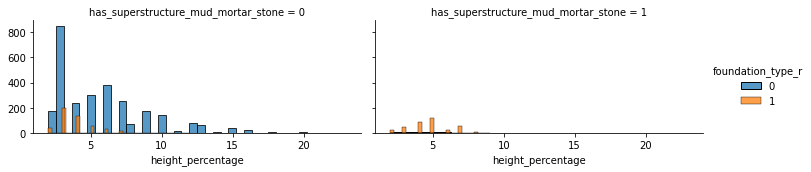

In [ ]:
sns.FacetGrid(df_eval_1_2.query('y_true==1 and y_pred==1'), col='has_superstructure_mud_mortar_stone', aspect=2, height=2.5,
              hue='foundation_type_r').map_dataframe(sns.histplot, 'height_percentage').add_legend();

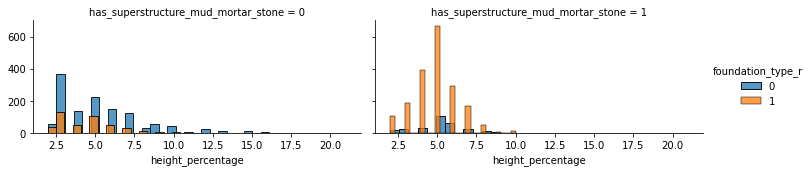

In [ ]:
sns.FacetGrid(df_eval_1_2.query('y_true==1 and y_pred==2'), col='has_superstructure_mud_mortar_stone', aspect=2, height=2.5,
              hue='foundation_type_r').map_dataframe(sns.histplot, 'height_percentage').add_legend();

In [ ]:
df_eval_1_2.query('y_true==1 and y_pred==2')['ground_floor_type_v'].mean(),\
df_eval_1_2.query('y_true==1 and y_pred==1')['ground_floor_type_v'].mean()

(0.24770882429955485, 0.5943600867678959)

In [ ]:
df_eval_1_2.query('y_true==1 and y_pred==1')['ground_floor_type_f'].mean(),\
df_eval_1_2.query('y_true==1 and y_pred==2')['ground_floor_type_f'].mean()

(0.31344902386117135, 0.6561927206074889)

In [ ]:
df_eval_1_2.query('y_true==1 and y_pred==1')['other_floor_type_q'].mean(),\
df_eval_1_2.query('y_true==1 and y_pred==2')['other_floor_type_q'].mean()

(0.11279826464208242, 0.46111547525530244)

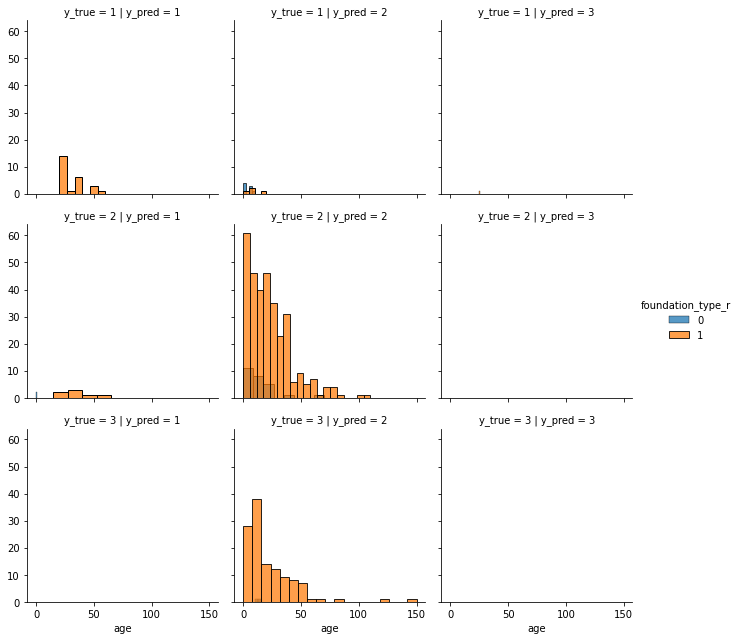

In [ ]:
sns.FacetGrid(df_eval_1_2.query('geo_level_2_id < 15'), row='y_true', col='y_pred', 
              hue='foundation_type_r').map_dataframe(sns.histplot, 'age').add_legend();

### Submission

In [ ]:
val_df.shape

(86868, 26)

In [ ]:
ids = val['building_id']

In [ ]:
pred_submission = mdl.predict(val_df)

In [ ]:
submission = pd.DataFrame(pred_submission, index=ids, columns=['damage_grade'])

In [ ]:
submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,3
745817,1
421793,3


In [ ]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Competições/Modeling Earthquake Damage/submission.csv')